In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind

In [2]:
df_titanic = pd.read_csv("titanic.csv")

### Funcion: get_features_cat_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [ ]:
def get_features_cat_regression(df, target_col, pvalue=0.05):
    """"
    Identifica columnas categóricas significativamente asociadas con una variable numérica con alta cardinalidad.
    Esta función evalúa la relación entre variables categóricas y una variable objetivo mediante pruebas estadísticas:
    - Prueba t de Student si hay 2 categorías.
    - ANOVA de un factor si hay más de 2 categorías.

    Argumentos:
    df (pandas.DataFrame): DataFrame con los datos.
    target_col (str): El nombre de la columna objetivo que se desea predecir.
    pvalue (float, opcional (default=0.05)): Umbral de significación estadística. Solo se seleccionan variables categóricas cuyo p-valor sea menor a este valor.

    Retorna: lista or None
    Lista de nombres de columnas categóricas que muestran una diferencia estadísticamente significativa en el target_col. 
    None si hay errores o si no se encuentra ninguna.
    """ 

    # Comprobaciones de entrada
    if not isinstance(df, pd.DataFrame):
        print("Error: El argumento 'df' debe ser un DataFrame.")
        return None

    if not isinstance(target_col, str) or target_col not in df.columns:
        print(f"Error: {target_col} debe ser una columna existente del DataFrame.")
        return None
    
    if not (0 < pvalue < 1):
        print("Error: 'pvalue' debe ser un float entre 0 y 1.")
        return None
    
    # Comprobar que es numerica con alta cardinalidad, siendo la proporción de valores únicos mayor al 5%
    num_unique = df[target_col].nunique()
    num_total = len(df[target_col].dropna())

    if df[target_col].dtype not in [np.int64, np.float64] or num_unique / num_total < 0.05:
        print(f"Error: La columna '{target_col}' no parece ser numérica con alta cardinalidad.")
        return None

    # Filtrar columnas categóricas
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    if not cat_cols:
        print("No hay columnas categóricas en el DataFrame.")
        return None 

    lista_categoricas = []

    for col in cat_cols:
        if col == target_col:
            continue

        # Eliminar filas con nulos en col o target_col
        subset = df[[col, target_col]].dropna()

        # Agrupar los valores del target por categoría
        groups = subset.groupby(col)[target_col].apply(list)

        if len(groups) < 2:
            continue

        try:
            if len(groups) == 2: # t-test cuando es igual a dos
                stat, p = ttest_ind(*groups, equal_var=False)
            else: #ANOVA si hay más de dos grupos
                stat, p = f_oneway(*groups)

            if p < pvalue:
                lista_categoricas.append(col)
        
        except Exception as e:
            print("Error")
            continue

    return lista_categoricas

In [4]:
get_features_cat_regression(df_titanic, "age")

['sex', 'class', 'who', 'alive']

### Funcion: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

In [ ]:
def plot_features_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False):
    """
    Genera histogramas agrupados de la variable objetivo para analizar la relación con  otras variables. 
    Y devuelve la lista de columnas cuya relación con target_col es estadísticamente significativa.

    Argumentos:
    df (pd.DataFrame): DataFrame con los datos.
    target_col (str): Nombre de la variable objetivo (target).
    columns (list, opcional): Lista de nombres de columnas a considerar (por defecto, se usan todas las numéricas).
    pvalue (float, opcional): Nivel de significación estadística.
    with_individual_plot (bool, opcional (default=False)): Si es True, muestra los histogramas por variable significativa.

    Retorna: lista or None
    Lista de columnas cuya relación con target_col es estadísticamente significativa.
    None si hay errores o si no se encuentra ninguna.
    """
    
    # Comprobaciones de entrada
    if not isinstance(df, pd.DataFrame):
        print("Error: El argumento 'df' debe ser un DataFrame.")
        return None

    if not isinstance(target_col, str) or target_col not in df.columns:
        print(f"Error: {target_col} debe ser una columna existente del DataFrame.")
        return None
    
    if not isinstance(columns, list):
        print("Error: 'columns' debe ser una lista.")
        return None
    
    if not (0 < pvalue < 1):
        print("Error: 'pvalue' debe ser un float entre 0 y 1.")
        return None
    
    # Comprobar que es numerica con alta cardinalidad, siendo la proporción de valores únicos mayor al 5%
    num_unique = df[target_col].nunique()
    num_total = len(df[target_col].dropna())

    if df[target_col].dtype not in [np.int64, np.float64] or num_unique / num_total < 0.05:
        print(f"Error: La columna '{target_col}' no parece ser numérica con alta cardinalidad.")
        return None

    # Si columns está vacía, usar las variables numéricas distintas de target_col
    if not columns:
        columns = [col for col in df.select_dtypes(include=np.number).columns if col != target_col]

    lista_columnas = []

    for col in columns:

        # Eliminar nulos
        subset = df[[col, target_col]].dropna()

        # Agrupar y test estadístico
        groups = subset.groupby(col)[target_col].apply(list)

        if len(groups) < 2:
            continue

        try:
            if len(groups) == 2: # t-test cuando es igual a dos
                stat, p = ttest_ind(*groups, equal_var=False)
            else: #ANOVA si hay más de dos grupos
                stat, p = f_oneway(*groups)

            if p < pvalue:
                lista_columnas.append(col)

        
            if with_individual_plot:

                if subset[col].dtype == "object": #con categóricas
                    plt.figure(figsize=(8, 5))
                    sns.histplot(data=subset, x=target_col, hue=col, alpha=0.5)
                    plt.title(f"Distribución de '{target_col}' según '{col}' (p={p:.4f})")
                    plt.xlabel(target_col)
                    plt.tight_layout()
                    plt.show()
                
                else: #con númericas
                    plt.figure(figsize=(8, 5))

                    if subset[col].nunique() / len(subset) > 0.05: #muchos valores únicos --> agrupamos
                        subset[f'{col}_bins'] = pd.cut(subset[col], 4)
                        sns.histplot(data=subset, x=target_col, hue=f'{col}_bins', alpha=0.5)
                    else:
                        sns.histplot(data=subset, x=target_col, hue=col, alpha=0.5)

                    plt.title(f"Distribución de '{target_col}' según '{col}' (p={p:.4f})")
                    plt.xlabel(target_col)
                    plt.tight_layout()
                    plt.show()
                    

        except Exception as e:
            print("Error")
            continue

    return lista_columnas

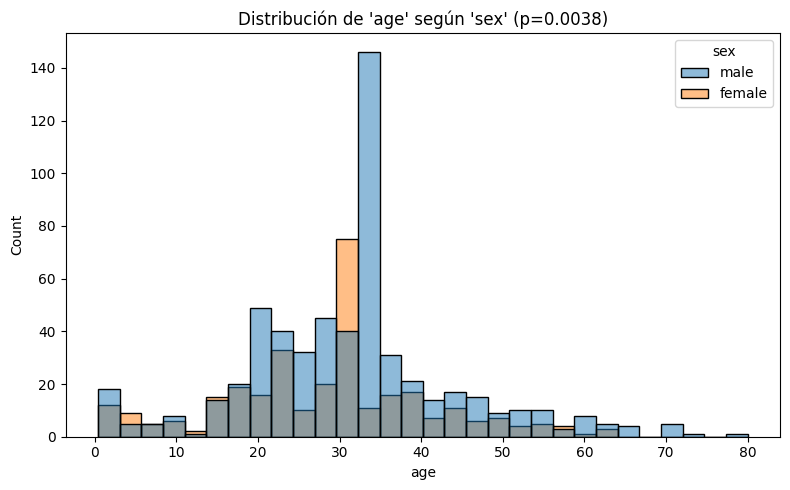

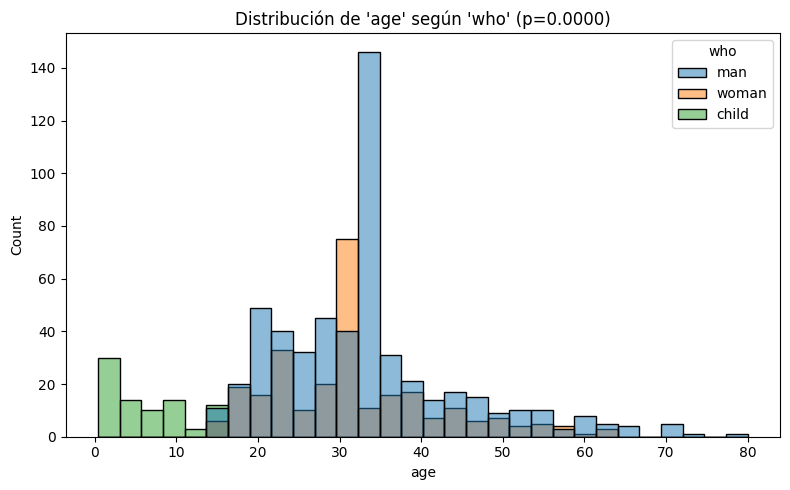

['sex', 'who']

In [54]:
plot_features_regression(df_titanic, target_col="age", columns=["sex", "who"], pvalue=0.05, with_individual_plot=True)

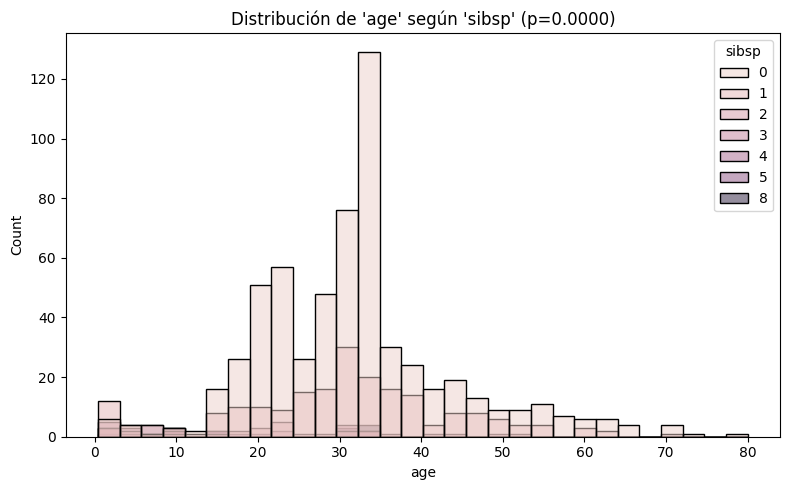

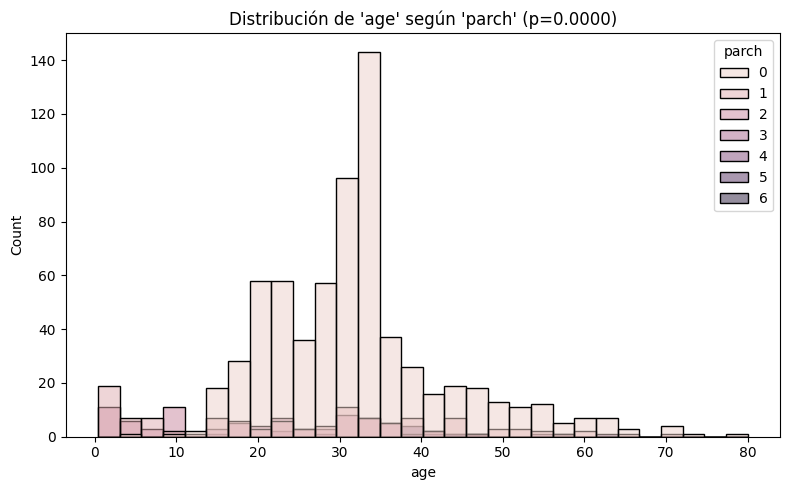

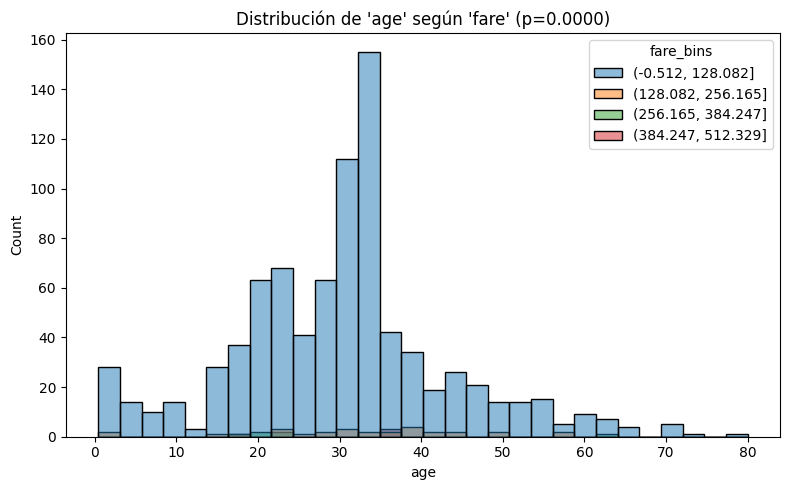

['sibsp', 'parch', 'fare']

In [55]:
plot_features_regression(df_titanic, target_col="age", columns=[], pvalue=0.05, with_individual_plot=True)